In [1]:
import tomli
import httpx
import pandas as pd
with open("..\\..\\.streamlit\\secrets.toml",'rb') as f:
	config = tomli.load(f)

# CDEC

In [2]:
import sys
data_path = r'\\ppeng.com\pzdata\docs\Project Resources\Ag Water\apps\district_management\data'
sys.path.append(data_path)
from CDEC import CDEC

In [7]:
date_range = [
	'2020-10-01',
	'2021-09-30'
]
DYC = CDEC('DYC',date_range=date_range)
df = DYC.get_data(
    45,"D"
)

In [9]:
# df

,stationId,durCode,SENSOR_NUM,sensorType,obsDate,value,dataFlag,units
date,,,,,,,,
2020-10-01,DYC,D,45,PPT INC,2020-10-1 00:00,NaN,,INCHES
2020-10-02,DYC,D,45,PPT INC,2020-10-2 00:00,0.0,,INCHES
2020-10-03,DYC,D,45,PPT INC,2020-10-3 00:00,0.0,,INCHES
2020-10-04,DYC,D,45,PPT INC,2020-10-4 00:00,0.0,,INCHES
2020-10-05,DYC,D,45,PPT INC,2020-10-5 00:00,0.0,,INCHES
...,...,...,...,...,...,...,...,...
2021-09-26,DYC,D,45,PPT INC,2021-9-26 00:00,NaN,,INCHES
2021-09-27,DYC,D,45,PPT INC,2021-9-27 00:00,NaN,,INCHES
2021-09-28,DYC,D,45,PPT INC,2021-9-28 00:00,NaN,,INCHES


<Axes: xlabel='date'>

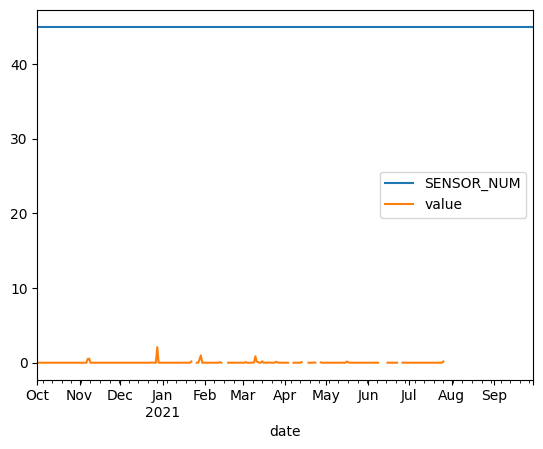

In [8]:
df.plot()




NOAA

https://hdsc.nws.noaa.gov/hdsc/pfds/pfds_map_cont.html

# Locations

In [2]:
def coords_from_bound_box(bound_box):
	cs = bound_box['geometry']['coordinates'][0]
	return f"{cs[0][1]},{cs[0][0]},{cs[2][1]},{cs[2][0]}"


In [3]:
bound_box = {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-120.567398,36.716871],[-120.567398,36.950989],[-119.929504,36.950989],[-119.929504,36.716871],[-120.567398,36.716871]]]}}
bound_box = {"type":"Feature","properties":{},"geometry":{"type":"Polygon","coordinates":[[[-117.848282,33.984933],[-117.848282,34.263459],[-117.305832,34.263459],[-117.305832,33.984933],[-117.848282,33.984933]]]}}
coords_from_bound_box(bound_box)

'33.984933,-117.848282,34.263459,-117.305832'

In [4]:
base_url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/stations'
R = httpx.get(
    base_url,
    headers={'token':config['NOAA']['token']},
    params={
        'limit':1000,
        # 'datasetid':'GHCND'
        # "extent":'47.5204,-122.2047,47.6139,-122.1065'
        "extent":coords_from_bound_box(bound_box),
        }
    )


In [5]:
import pandas as pd
df=pd.DataFrame(R.json()['results'])
print(df.shape)
stations = df.sort_values('maxdate',ascending=False)
stations.head(3)

(80, 9)


,elevation,mindate,maxdate,latitude,name,datacoverage,id,elevationUnit,longitude
78,281.6,1968-01-01,2023-08-22,34.05314,"ONTARIO INTERNATIONAL AIRPORT, CA US",0.46,WBAN:03102,METERS,-117.57689
79,308.2,2005-04-26,2023-08-21,34.10000,"LA VERNE BRACKETT FIELD, CA US",0.44,WBAN:03180,METERS,-117.78333
76,792.5,1986-02-01,2023-08-20,34.20690,"TANBARK CALIFORNIA, CA US",1.00,GHCND:USR0000CTAN,METERS,-117.76060


# Datasets

In [90]:
base_url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/datasets'

R = httpx.get(
    base_url,
    headers={'token':config['NOAA']['token']},
    )
print(R)
print(R.url)
print(R.json())
df=pd.DataFrame(R.json()['results'])
print(df.shape)
df.head(20)

<Response [200 ]>
https://www.ncei.noaa.gov/cdo-web/api/v2/datasets
{'metadata': {'resultset': {'offset': 1, 'count': 11, 'limit': 25}}, 'results': [{'uid': 'gov.noaa.ncdc:C00861', 'mindate': '1763-01-01', 'maxdate': '2023-05-13', 'name': 'Daily Summaries', 'datacoverage': 1, 'id': 'GHCND'}, {'uid': 'gov.noaa.ncdc:C00946', 'mindate': '1763-01-01', 'maxdate': '2023-05-01', 'name': 'Global Summary of the Month', 'datacoverage': 1, 'id': 'GSOM'}, {'uid': 'gov.noaa.ncdc:C00947', 'mindate': '1763-01-01', 'maxdate': '2023-01-01', 'name': 'Global Summary of the Year', 'datacoverage': 1, 'id': 'GSOY'}, {'uid': 'gov.noaa.ncdc:C00345', 'mindate': '1991-06-05', 'maxdate': '2023-05-13', 'name': 'Weather Radar (Level II)', 'datacoverage': 0.95, 'id': 'NEXRAD2'}, {'uid': 'gov.noaa.ncdc:C00708', 'mindate': '1994-05-20', 'maxdate': '2023-05-13', 'name': 'Weather Radar (Level III)', 'datacoverage': 0.95, 'id': 'NEXRAD3'}, {'uid': 'gov.noaa.ncdc:C00821', 'mindate': '2010-01-01', 'maxdate': '2010-01-01',

,uid,mindate,maxdate,name,datacoverage,id
0,gov.noaa.ncdc:C00861,1763-01-01,2023-05-13,Daily Summaries,1.00,GHCND
1,gov.noaa.ncdc:C00946,1763-01-01,2023-05-01,Global Summary of the Month,1.00,GSOM
2,gov.noaa.ncdc:C00947,1763-01-01,2023-01-01,Global Summary of the Year,1.00,GSOY
3,gov.noaa.ncdc:C00345,1991-06-05,2023-05-13,Weather Radar (Level II),0.95,NEXRAD2
4,gov.noaa.ncdc:C00708,1994-05-20,2023-05-13,Weather Radar (Level III),0.95,NEXRAD3
5,gov.noaa.ncdc:C00821,2010-01-01,2010-01-01,Normals Annual/Seasonal,1.00,NORMAL_ANN
6,gov.noaa.ncdc:C00823,2010-01-01,2010-12-31,Normals Daily,1.00,NORMAL_DLY
7,gov.noaa.ncdc:C00824,2010-01-01,2010-12-31,Normals Hourly,1.00,NORMAL_HLY
8,gov.noaa.ncdc:C00822,2010-01-01,2010-12-01,Normals Monthly,1.00,NORMAL_MLY
9,gov.noaa.ncdc:C00505,1970-05-12,2014-01-01,Precipitation 15 Minute,0.25,PRECIP_15


In [136]:
station_ids = stations['id'].tolist()
print(station_ids)
# station_list = "&".join()
# station_list

base_url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/datasets'

R = httpx.get(
    base_url,
    headers={'token':config['NOAA']['token']},
    params={
        'stationid':station_ids[2],
        }
    )
print(R)
print(R.url)
print(R.json())
df=pd.DataFrame(R.json()['results'])
print(df.shape)
df.head(20)

['WBAN:03180', 'WBAN:03102', 'GHCND:USR0000CTAN', 'GHCND:USR0000CLYT', 'GHCND:USR0000CCLA', 'GHCND:US1CASR0074', 'GHCND:US1CALA0081', 'GHCND:US1CALA0096', 'GHCND:US1CARV0036', 'GHCND:USW00003102', 'GHCND:US1CASR0029', 'GHCND:US1CASR0055', 'GHCND:US1CASR0053', 'GHCND:US1CARV0053', 'GHCND:US1CARV0067', 'GHCND:US1CALA0023', 'GHCND:US1CASR0068', 'GHCND:US1CASR0034', 'GHCND:US1CALA0059', 'GHCND:US1CASR0063', 'GHCND:US1CASR0051', 'GHCND:US1CALA0015', 'GHCND:US1CASR0010', 'GHCND:USR0000CDVR', 'GHCND:US1CASR0004', 'GHCND:USC00047050', 'GHCND:USC00045218', 'GHCND:USC00047749', 'COOP:047749', 'COOP:047050', 'COOP:048436', 'COOP:045212', 'GHCND:USC00043452', 'COOP:043452', 'GHCND:US1CASR0018', 'COOP:045218', 'COOP:042895', 'COOP:047750', 'COOP:042432', 'GHCND:USC00043118', 'COOP:043118', 'GHCND:USC00043120', 'COOP:043120', 'GHCND:USC00040758', 'GHCND:USC00041779', 'COOP:040758', 'COOP:041779', 'GHCND:USC00049158', 'COOP:049158', 'COOP:047712', 'COOP:045900', 'GHCND:USC00045900', 'GHCND:USC0004484

,uid,mindate,maxdate,name,datacoverage,id
0,gov.noaa.ncdc:C00861,1763-01-01,2023-05-13,Daily Summaries,1,GHCND
1,gov.noaa.ncdc:C00946,1763-01-01,2023-05-01,Global Summary of the Month,1,GSOM
2,gov.noaa.ncdc:C00947,1763-01-01,2023-01-01,Global Summary of the Year,1,GSOY


# Data

In [5]:
base_url = 'https://www.ncei.noaa.gov/cdo-web/api/v2/data'


for station in station_ids[:2]:
    R = httpx.get(
        base_url,
        headers={'token':config['NOAA']['token']},
        params={
            'datasetid':'GHCND',
            'datatypeid':'PRCP',
            'stationid':station,
            'startdate':start_date.format('YYYY-MM-DD'),
            'enddate':end_date.format('YYYY-MM-DD'),
            'limit':1000,
            },
            timeout=30
        )
    try:
        df=pd.DataFrame(R.json()['results'])
        print(station)
        print(df.shape)
        df.head(2)
    except:
        pass

NameError: name 'station_ids' is not defined

In [20]:
import arrow
start_date = arrow.get('2022-12-01')
end_date = arrow.get('2023-01-01')
working_stations = [
    "GHCND:US1CASR0074",
    "GHCND:US1CALA0081",
    "GHCND:US1CALA0096",
]

R = httpx.get(
    base_url,
    headers={'token':config['NOAA']['token']},
    params={
        'datasetid':'GHCND',
        'datatypeid':'PRCP',
        'stationid':working_stations,
        'startdate':start_date.format('YYYY-MM-DD'),
        'enddate':end_date.format('YYYY-MM-DD'),
        'units':'standard',
        'limit':1000,
        'includemetadata':'false',
        },
        timeout=30
    )

df=pd.DataFrame(R.json()['results'])
# print(station)
print(df.shape)
df.head(3)

(96, 5)


,date,datatype,station,attributes,value
0,2022-12-01T00:00:00,PRCP,GHCND:US1CALA0081,",,N,0700",0.0
1,2022-12-01T00:00:00,PRCP,GHCND:US1CALA0096,",,N,0811",0.0
2,2022-12-01T00:00:00,PRCP,GHCND:US1CASR0074,",,N,0700",0.0


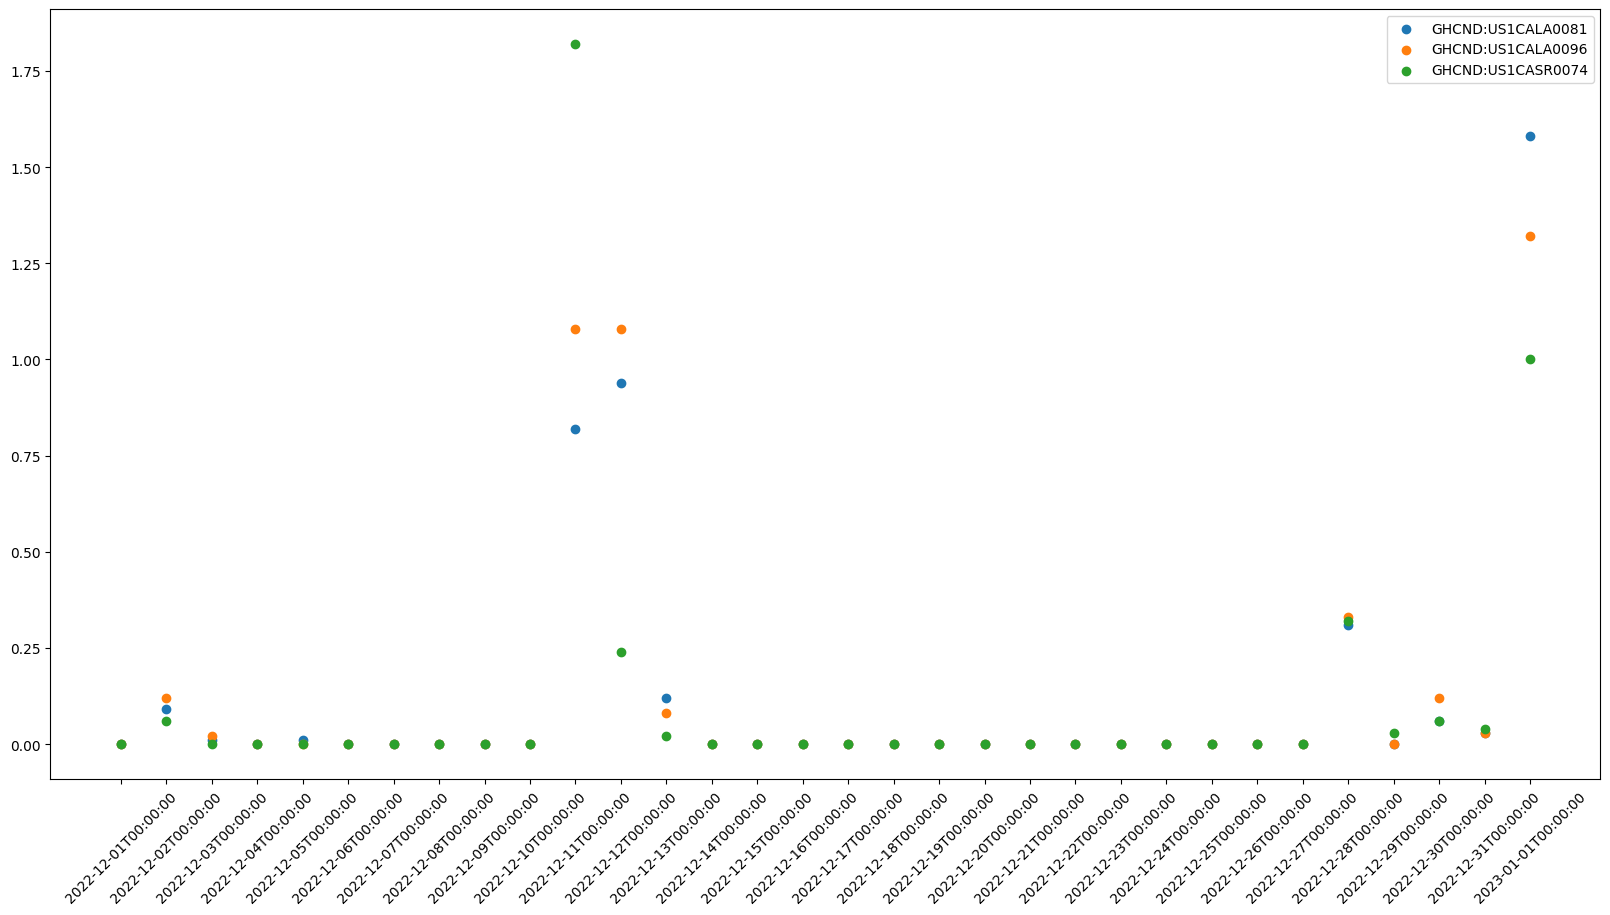

In [19]:
def plot_precip_by_station():
	"""
	x=date
	y=value
	color=station
	type=bar
	"""
	import matplotlib.pyplot as plt
	fig, ax = plt.subplots(figsize=(20,10))
	# df.groupby('station').plot(x='date',y='value',ax=ax)
	for station in df['station'].unique():
		data = df[df['station']==station]
		#.plot(x='date',y='value',ax=ax,label=station)
		# ax.bar(data['date'],data['value'],label=station)
		ax.scatter(data['date'],data['value'],label=station)

	ax.legend()
	# rotate x labels
	# x axis format = "YYYY-MM-DD"

	from matplotlib.dates import DateFormatter
	# DateFormatter('%Y-%m-%d')
	# ax.xaxis.set_major_locator()
	# ax.xaxis.set_major_formatter(DateFormatter('%Y-%m-%d'))
	for tick in ax.get_xticklabels():
		tick.set_rotation(45)

	plt.show()
plot_precip_by_station()

In [106]:
url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GHCND&locationid=ZIP:28801&startdate=2010-05-01&enddate=2010-05-01"
url = "https://www.ncei.noaa.gov/cdo-web/api/v2/data?datasetid=GSOM&stationid%5B%5D=WBAN%3A03180&stationid%5B%5D=WBAN%3A03102&stationid%5B%5D=GHCND%3AUSR0000CTAN&startdate=2023-01-01&enddate=2021-01-01&limit=100"
R = httpx.get(
    url,
    headers={'token':config['NOAA']['token']},
    # params={
    #     # 'datasetid':'GHCND',
    #     'datasetid':'GSOM',
    #     'stationid[]':station_ids,
    #     'startdate':start_date.format('YYYY-MM-DD'),
    #     'enddate':end_date.format('YYYY-MM-DD'),
    #     'limit':100,
    #     },
    )
R.json()['results']

[{'date': '2010-05-01T00:00:00',
  'datatype': 'PRCP',
  'station': 'GHCND:US1NCBC0005',
  'attributes': ',,N,0700',
  'value': 0},
 {'date': '2010-05-01T00:00:00',
  'datatype': 'SNOW',
  'station': 'GHCND:US1NCBC0005',
  'attributes': ',,N,0700',
  'value': 0},
 {'date': '2010-05-01T00:00:00',
  'datatype': 'PRCP',
  'station': 'GHCND:USW00013872',
  'attributes': ',,0,2400',
  'value': 3},
 {'date': '2010-05-01T00:00:00',
  'datatype': 'SNOW',
  'station': 'GHCND:USW00013872',
  'attributes': ',,0,',
  'value': 0},
 {'date': '2010-05-01T00:00:00',
  'datatype': 'SNWD',
  'station': 'GHCND:USW00013872',
  'attributes': ',,0,',
  'value': 0},
 {'date': '2010-05-01T00:00:00',
  'datatype': 'TMAX',
  'station': 'GHCND:USW00013872',
  'attributes': ',,0,2400',
  'value': 267},
 {'date': '2010-05-01T00:00:00',
  'datatype': 'TMIN',
  'station': 'GHCND:USW00013872',
  'attributes': ',,0,2400',
  'value': 139},
 {'date': '2010-05-01T00:00:00',
  'datatype': 'TOBS',
  'station': 'GHCND:USW00

In [76]:
# df=pd.DataFrame(R.json()['results'])
# print(df.shape)
# df.head(2)
R.json()

{}

In [48]:
import leafmap
m = leafmap.Map()
# m